<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd #import library pandas
from sklearn.tree import DecisionTreeClassifier #import library Decision Tree Classifier
from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation
from IPython.display import Image #import library Image  
from sklearn.tree import export_graphviz #import library export_graphviz
import pydotplus #import library pydotplus

data=pd.read_csv('Social_Network.csv')
print(data)

           Id  Age  EstimatedSalary  Purchased  Gender
0    15624510   19            19000          0    Male
1    15810944   35            20000          0    Male
2    15668575   26            43000          0  Female
3    15603246   27            57000          0  Female
4    15804002   19            76000          0    Male
..        ...  ...              ...        ...     ...
217  15582066   40            78000          0    Male
218  15666675   46            96000          0  Female
219  15732987   59           143000          1    Male
220  15789432   41            80000          0  Female
221  15663161   35            91000          1    Male

[222 rows x 5 columns]


In [9]:
data = data.drop(labels='Id', axis=1)
feature_names=['Age','EstimatedSalary','Purchased'] #memilih kolom-kolom yang akan digunakan untuk menentukan keputusan
features = data[feature_names] #mengambil data yang akan menjadi penentu keputusan
label = data.Gender #mengambil data untuk jawaban dari keputusan

clf = DecisionTreeClassifier(random_state=0, max_depth=None,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0) #membuat objek Decision Tree classifer
clf = clf.fit(features,label) #melakukan training data dengan Decision Tree Classifer

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0) #untuk training data
prediction = clf.predict(X_test)  #memprediksi hasil/respond dari dataset

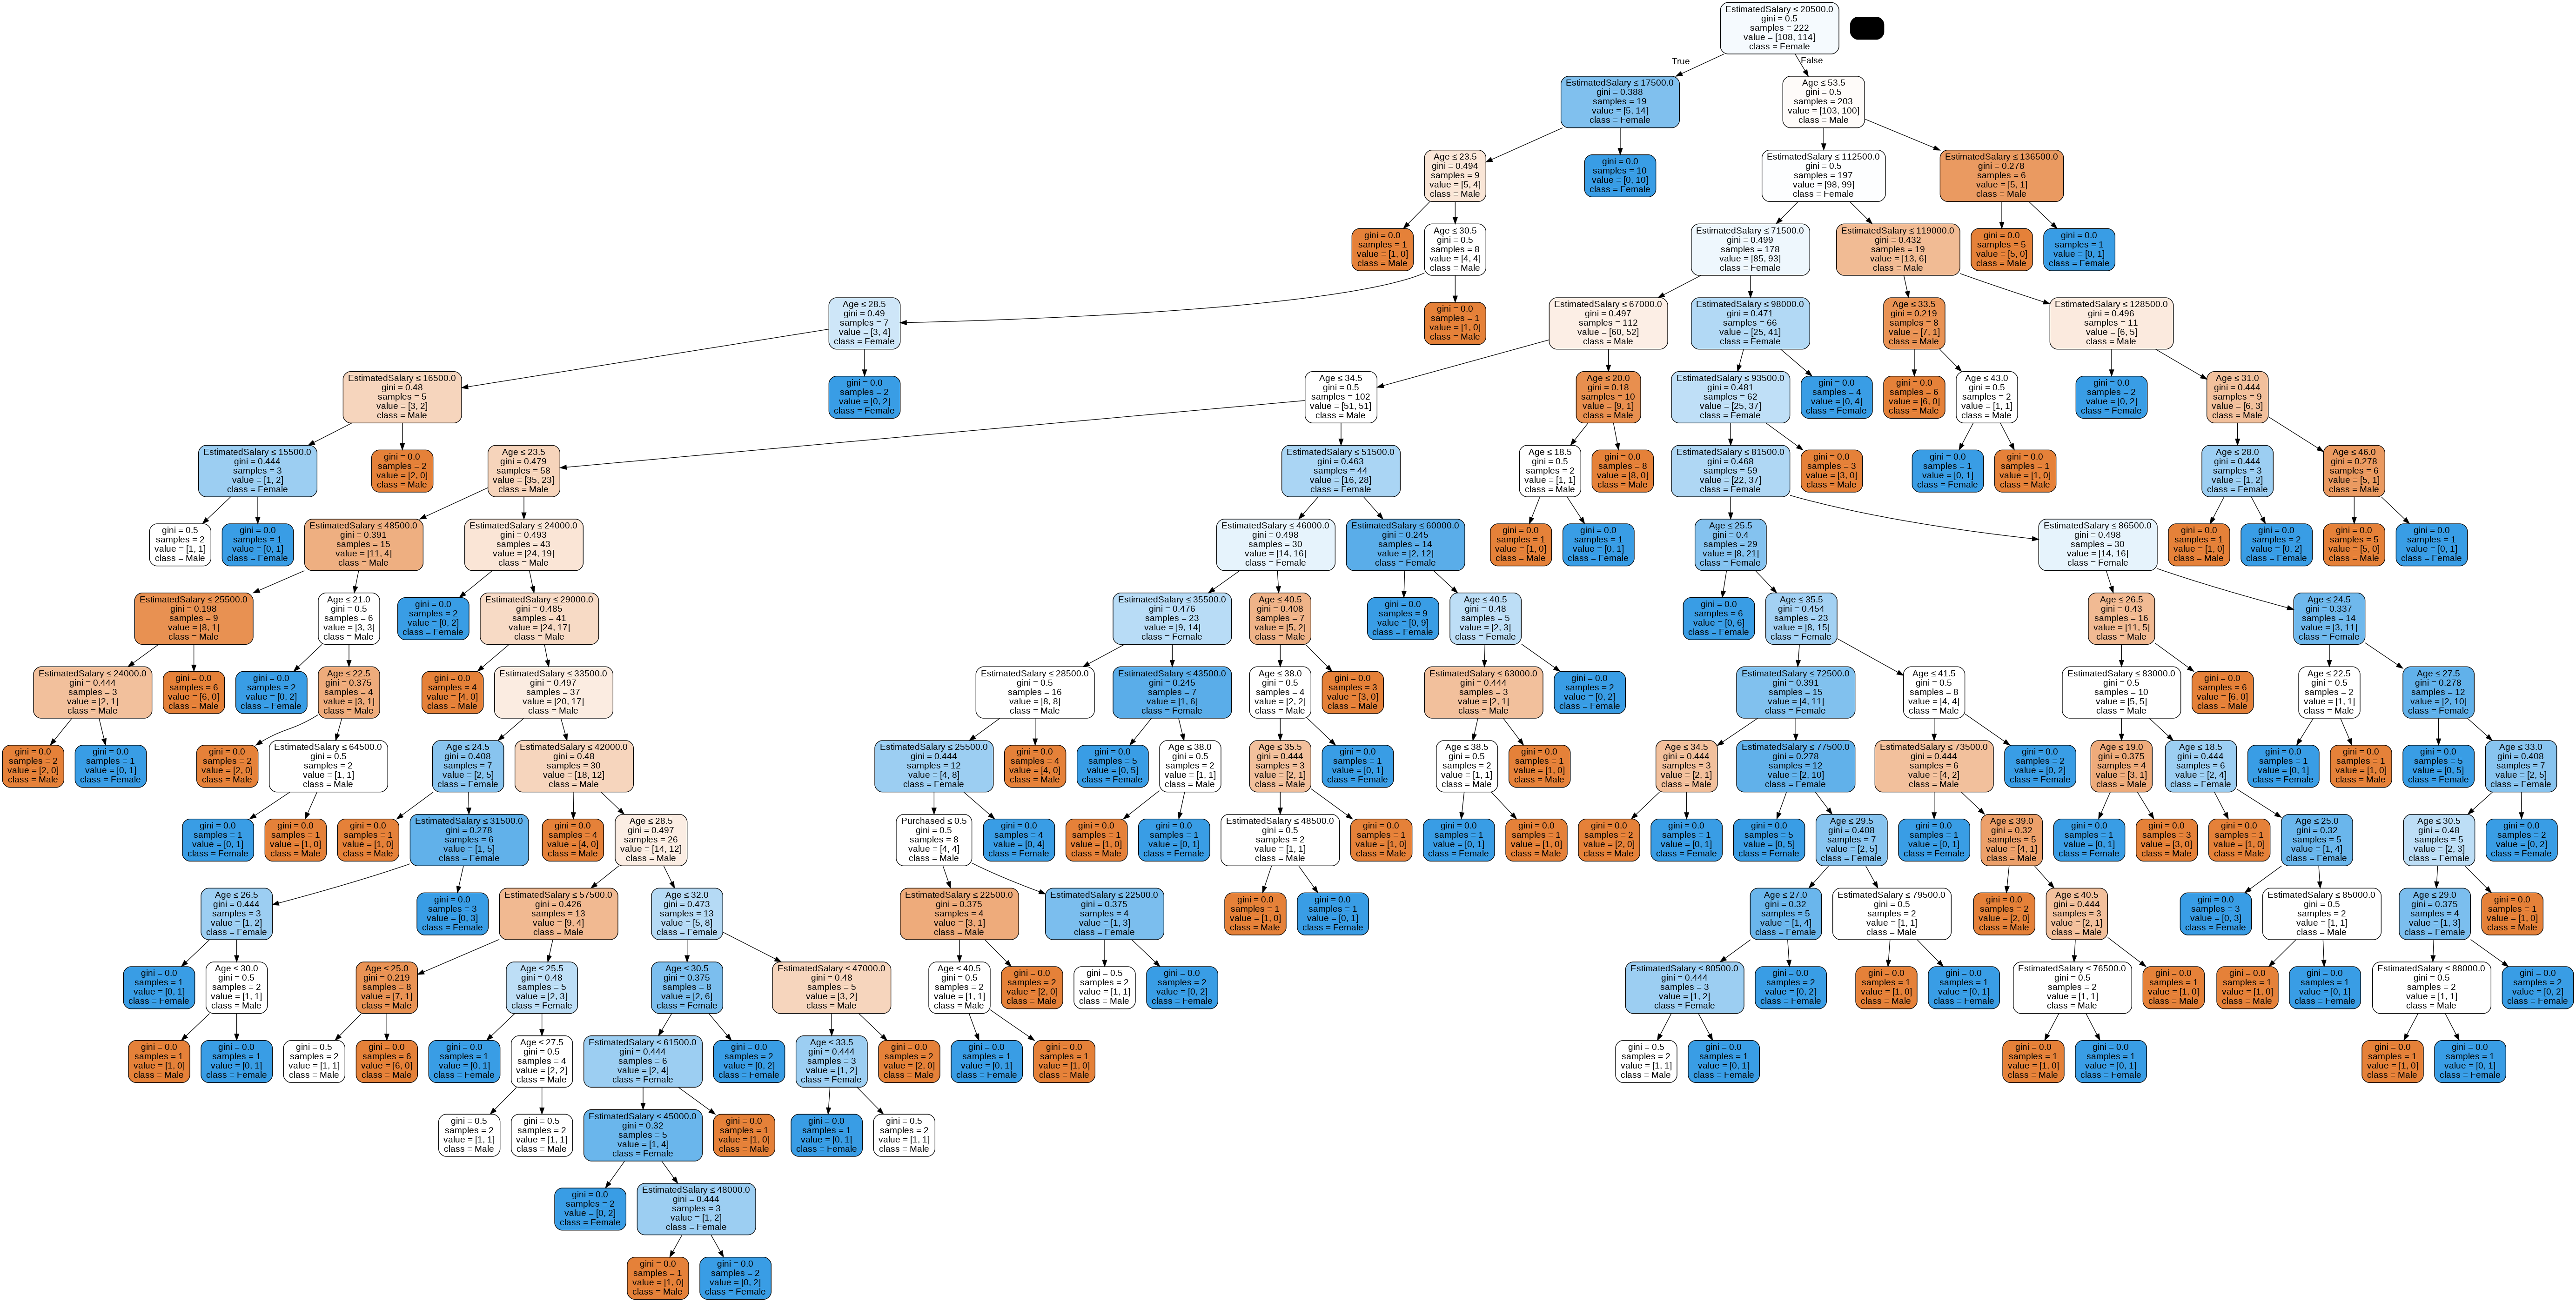

In [11]:
vis_data = export_graphviz(clf, out_file=None,   
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=feature_names,
                class_names=label.unique()) #mengatur tampilan dari diagram keputusan
graph = pydotplus.graph_from_dot_data(vis_data)  #memasukkan data hasil training kedalam diagram graph
graph.write_png('social_network_ads.png') #membuat nama file image dari diagram graph
Image(graph.create_png()) #membuat image gambar